# Bayesian Network

## 1. Import libraries

In [1]:
require("bnlearn")

Loading required package: bnlearn


Attaching package: ‘bnlearn’


The following object is masked from ‘package:stats’:

    sigma




## 2. Import count data (csv)

In [2]:
data <- read.csv("exp.csv",as.is=T,header=T,row=1)
param1 <- 1000000
nf <- param1/colSums(data)
data_cpm <- sweep(data, 2, nf, "*")
write.csv(data_cpm,"exp_cpm.csv")

## 3. bayesian network


  Bayesian network learned via Score-based methods

  model:
   [IL1R1][MAP3K7][TAB1|MAP3K7][NFKB1|IL1R1:MAP3K7:TAB1][IKBKB|NFKB1]
   [CHUK|IKBKB:MAP3K7][MAP3K1|CHUK][RIPK1|MAP3K1:IKBKB:CHUK][FADD|RIPK1:TAB1]
   [IL1A|RIPK1][TNFRSF1B|IL1R1:FADD][TRAF6|FADD][TNFAIP3|TNFRSF1B:IKBKB]
   [TNF|TNFRSF1B:RIPK1:CHUK:TRAF6][NFKBIA|IL1R1:TNFAIP3:TAB1:CHUK]
   [MYD88|NFKBIA:RIPK1:MAP3K7:TNF:IL1A][TRADD|TNFRSF1B:MYD88:MAP3K7:TRAF6]
   [TNFRSF1A|TNFRSF1B:NFKB1:TRADD:IL1A][MAP3K14|MAP3K1:TNFRSF1B:TRADD:TAB1]
   [RELA|TNFRSF1A:TAB1]
  nodes:                                 20 
  arcs:                                  46 
    undirected arcs:                     0 
    directed arcs:                       46 
  average markov blanket size:           8.60 
  average neighbourhood size:            4.60 
  average branching factor:              2.30 

  learning algorithm:                    Hill-Climbing 
  score:                                 BIC (Gauss.) 
  penalization coefficient:              2.

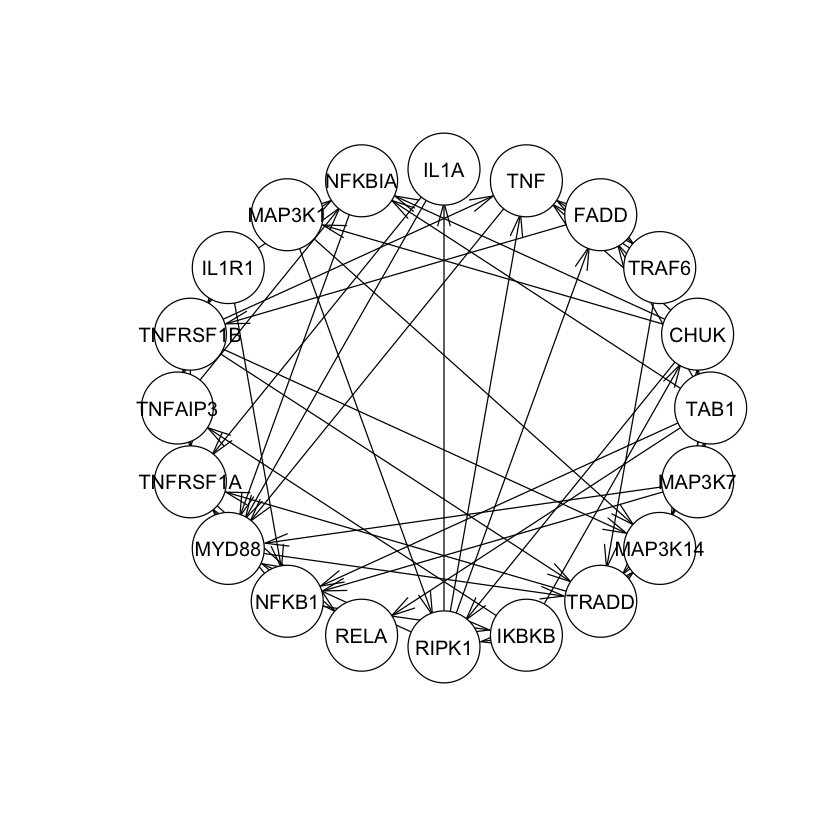

In [3]:
#gene sets
BIOCARTA_NFKB_PATHWAY <- read.table("BIOCARTA_NFKB_PATHWAY.txt",header=F,sep="\t",stringsAsFactors = F)
#plot
NFKB <- intersect(rownames(data_cpm),BIOCARTA_NFKB_PATHWAY[,1])
select <- as.data.frame(t(data_cpm)[,NFKB])
print(hc(select))
plot(hc(select))